## Wilcoxon Signed-Rank Test

The Wilcoxon Signed-Rank Test is a non-parametric test used to compare two related samples.  

In this part of your project, we want to test whether there is a significant change between:

- respondents’ perceived effectiveness of **Green@Community** in raising public environmental awareness (before), and  
- respondents’ overall satisfaction with **Green@Community**’s effectiveness after reading the information (after).

These correspond to the two Likert-scale questions:

1. **Q_env_awareness** – “How effective do you perceive the Green@Community to be in raising public environmental awareness?”  
2. **Q_satisfaction** – “After reading the above, do you think Green@Community's overall effectiveness is satisfactory?”

Both scales range from **1** (*very ineffective/unsatisfactory*) to **4** (*very effective/satisfactory*).

### Research Question

Is there a significant difference between:

- perceived effectiveness of **Green@Community** in raising public environmental awareness, and  
- satisfaction with **Green@Community**'s overall effectiveness after reading the information?

### Null Hypothesis

\(H_0\): There is **no significant difference** between perceived environmental-awareness effectiveness (before) and satisfaction (after).

### Alternative Hypothesis

\(H_1\): There is a **significant difference** between perceived environmental-awareness effectiveness (before) and satisfaction (after).


Selected columns:
Environmental awareness effectiveness column: 你認為「綠在區區」提升公眾環保意識的成效如何？
How effective do you perceive the Green@Community to be in raising public environmental awareness?
Satisfaction column: 在了解以上數據後，你覺得「綠在區區」的整體效益是否令人滿意？
After reading the above, do you think Green@Community's overall effectiveness is satisfactory? 

Data Summary:
Number of paired observations: 128

Perceived effectiveness in raising public environmental awareness (before):
count    128.000000
mean       2.531250
std        0.822302
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: 你認為「綠在區區」提升公眾環保意識的成效如何？\nHow effective do you perceive the Green@Community to be in raising public environmental awareness?, dtype: float64

Satisfaction with overall effectiveness (after):
count    128.000000
mean       2.015625
std        0.813124
min        1.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: 在了解以上數據後，你覺得「綠在區

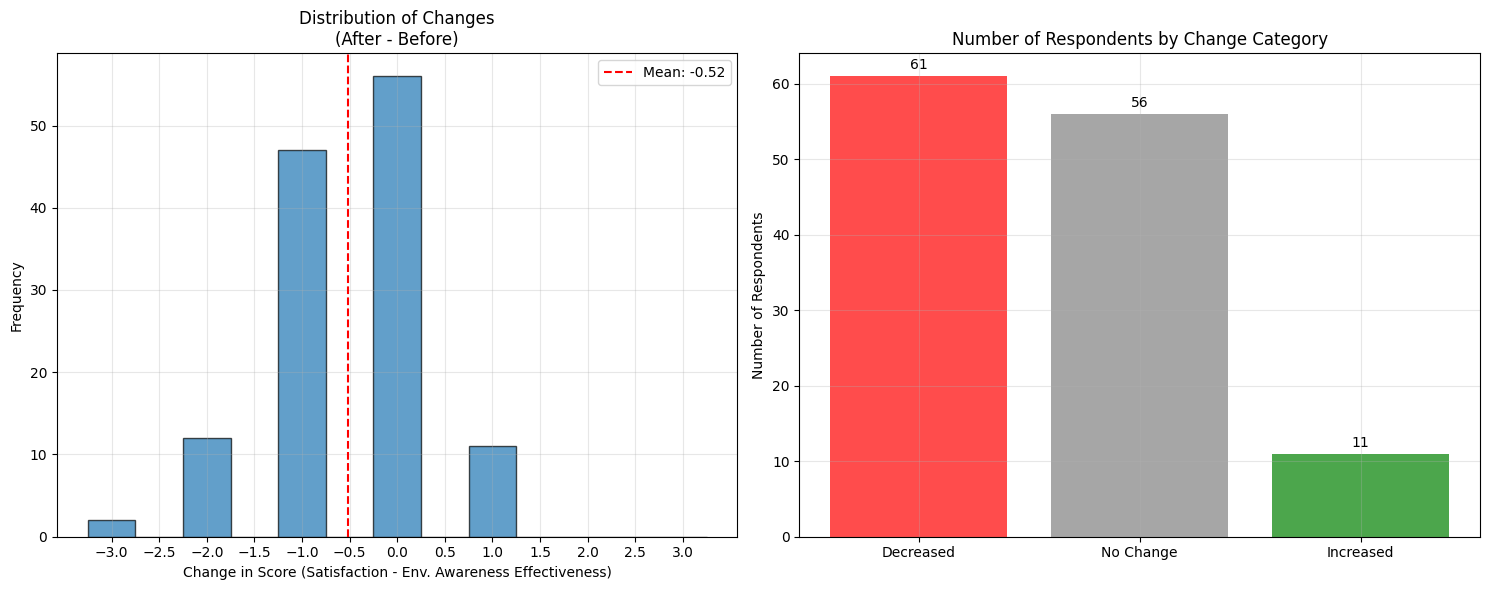


Summary of Changes:
Mean change: -0.516
Median change: 0.000
Standard deviation of changes: 0.842
Range of changes: -3.0 to 1.0


In [1]:
# ============================================================
# Wilcoxon Signed-Rank Test:
# Environmental awareness effectiveness vs. satisfaction
# ============================================================

# If you haven't installed these before, uncomment and run:
# !pip install pandas scipy matplotlib openpyxl

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import wilcoxon, ttest_rel

# -------------------------
# 1. Load the dataset
# -------------------------

df = pd.read_excel("../GCAP3226 G@C Survey Responses_cleaned data.xlsx")

# For safety, you can check all column names once (optional)
# print(list(enumerate(df.columns)))

# We will select the two columns by matching part of the question text:
#   - "raising public environmental awareness"
#   - "overall effectiveness is satisfactory"

env_awareness_col = [
    c for c in df.columns 
    if "raising public environmental awareness" in str(c)
][0]

satisfaction_col = [
    c for c in df.columns 
    if "overall effectiveness is satisfactory" in str(c)
][0]

print("Selected columns:")
print("Environmental awareness effectiveness column:", env_awareness_col)
print("Satisfaction column:", satisfaction_col, "\n")

# Extract the two series
env_awareness_raw = df[env_awareness_col]
satisfaction_raw = df[satisfaction_col]

# -------------------------
# 2. Clean and align the data
# -------------------------

# Keep only rows where BOTH answers are not missing
common_indices = df.dropna(subset=[env_awareness_col, satisfaction_col]).index
env_awareness = df.loc[common_indices, env_awareness_col].astype(float)
satisfaction = df.loc[common_indices, satisfaction_col].astype(float)

print("Data Summary:")
print("======================================")
print(f"Number of paired observations: {len(env_awareness)}\n")

print("Perceived effectiveness in raising public environmental awareness (before):")
print(env_awareness.describe())
print("\nSatisfaction with overall effectiveness (after):")
print(satisfaction.describe())

# -------------------------
# 3. Calculate the difference (After - Before)
# -------------------------
difference = satisfaction - env_awareness

print("\nDifference (After - Before):")
print(difference.describe())
print(f"\nNumber of positive changes (After > Before): {(difference > 0).sum()}")
print(f"Number of negative changes (After < Before): {(difference < 0).sum()}")
print(f"Number of no changes      (After = Before): {(difference == 0).sum()}")

# -------------------------
# 4. Wilcoxon Signed-Rank Test
# -------------------------
# This test compares the median of the paired differences to zero
statistic, p_value = wilcoxon(env_awareness, satisfaction, alternative='two-sided')

print("\nWilcoxon Signed-Rank Test Results:")
print("======================================")
print(f"Test Statistic: {statistic:.4f}")
print(f"P-value:        {p_value:.6f}")
print("Significance Level: α = 0.05")

# -------------------------
# 5. Interpretation
# -------------------------
print("\nInterpretation:")
if p_value < 0.05:
    print("✓ REJECT the null hypothesis (H₀)")
    print("✓ There IS a statistically significant difference")
    print("  between perceived environmental-awareness effectiveness")
    print("  and satisfaction after reading the information.")
else:
    print("✗ FAIL to reject the null hypothesis (H₀)")
    print("✗ There is NO statistically significant difference")
    print("  between perceived environmental-awareness effectiveness")
    print("  and satisfaction after reading the information.")

# Direction of change
mean_diff = difference.mean()
median_diff = difference.median()
print(f"\nMean change (After - Before): {mean_diff:.3f}")
print(f"Median change (After - Before): {median_diff:.3f}")

if mean_diff > 0:
    print("On average, satisfaction scores are HIGHER than initial perceived environmental-awareness effectiveness.")
elif mean_diff < 0:
    print("On average, satisfaction scores are LOWER than initial perceived environmental-awareness effectiveness.")
else:
    print("On average, there is no change between the two scores.")

# -------------------------
# 6. Effect Size (Cohen's d approximation)
# -------------------------
# We approximate effect size by converting the paired t-test statistic to Cohen's d
t_stat, _ = ttest_rel(satisfaction, env_awareness)
n = len(env_awareness)
cohens_d = t_stat / np.sqrt(n)

print("\nEffect Size (Cohen's d approximation):")
print(f"Cohen's d: {cohens_d:.4f}")

if abs(cohens_d) < 0.2:
    effect_size = "negligible"
elif abs(cohens_d) < 0.5:
    effect_size = "small"
elif abs(cohens_d) < 0.8:
    effect_size = "medium"
else:
    effect_size = "large"

print(f"Effect size interpretation: {effect_size}")

# -------------------------
# 7. Visualisations
# -------------------------
plt.style.use("default")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 7.1 Histogram of differences
# Make bars centered on x-axis numbers, while still showing intermediate ticks
bin_centers = np.arange(-3, 3.01, 0.5)        # -3, -2.5, ..., 3.0
bin_edges = np.arange(-3.25, 3.26, 0.5)       # edges so centers match bin_centers

axes[0].hist(difference, bins=bin_edges, alpha=0.7, edgecolor='black')

# Mean line in red
axes[0].axvline(difference.mean(), color='red', linestyle='--',
                label=f'Mean: {difference.mean():.2f}')

# x-axis ticks exactly at bin centres
axes[0].set_xticks(bin_centers)

axes[0].set_title('Distribution of Changes\n(After - Before)')
axes[0].set_xlabel('Change in Score (Satisfaction - Env. Awareness Effectiveness)')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# 7.2 Bar chart of change categories
change_categories = ['Decreased', 'No Change', 'Increased']
change_counts = [
    (difference < 0).sum(),
    (difference == 0).sum(),
    (difference > 0).sum()
]

# Three different colours for the bars
bar_colors = ['red', 'gray', 'green']  # decreased, no change, increased
bars = axes[1].bar(change_categories, change_counts,
                   alpha=0.7, color=bar_colors)

axes[1].set_title('Number of Respondents by Change Category')
axes[1].set_ylabel('Number of Respondents')
axes[1].grid(True, alpha=0.3)

# Add value labels on bars
for bar, count in zip(bars, change_counts):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width() / 2., height + 0.5,
                 f'{count}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# -------------------------
# 8. Summary of Changes
# -------------------------
print("\nSummary of Changes:")
print(f"Mean change: {difference.mean():.3f}")
print(f"Median change: {difference.median():.3f}")
print(f"Standard deviation of changes: {difference.std():.3f}")
print(f"Range of changes: {difference.min():.1f} to {difference.max():.1f}")
